In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from common.nord_mpl import set_palette, NORD_COLORBLIND

In [13]:
# Set scientific plot style and color palette
plt.style.use(["science", "vibrant"])
set_palette("colorblind")

['#5E81AC', '#D08770', '#EBCB8B', '#8FBCBB']

## Import Data

In [2]:
data_privileged = pd.read_parquet("./data/outputs/data_privilege/data_privilege_classification.parquet")
sufficient_specification = pd.read_parquet("./data/outputs/sufficient_specification/sufficient_query_specification_classification.parquet")

## Analyze Data Privilege

In [3]:
data_privilege_stat_mapping = []

for dataset in data_privileged["dataset"].unique():
    dataset_subset = data_privileged[data_privileged["dataset"] == dataset]
    data_privilege_stat_mapping.append({
        "Dataset": dataset,
        "Schema Dependence": 1-dataset_subset["schema_independent"].mean(),
        "Structural References": dataset_subset["final_structural_reference"].mean(),
        "Value References": dataset_subset["value_reference_binary"].mean(),
        "Container References": dataset_subset["final_container_reference"].mean()
    })
data_privilege_stats_df = pd.DataFrame(data_privilege_stat_mapping)

In [4]:
data_privilege_stats_df.sort_values(by="Schema Dependence", ascending=False, inplace=True)
data_privilege_stats_df

,Dataset,Schema Dependence,Structural References,Value References,Container References
3,DA-Eval,0.700389,0.626459,0.019455,0.252918
10,QTSumm,0.630000,0.620000,0.038000,0.026000
2,DA-Code,0.592000,0.166000,0.038000,0.508000
13,TableBench,0.346000,0.242000,0.016000,0.232000
9,OpenWikiTables,0.316000,0.232000,0.080000,0.098000
7,MMQA,0.300000,0.204000,0.208000,0.002000
6,KramaBench,0.277778,0.175926,0.101852,0.175926
11,Spider,0.272000,0.260000,0.056000,0.014000
0,BIRD,0.260000,0.212000,0.136000,0.006000
12,TabMWP,0.198000,0.000000,0.016000,0.196000


In [5]:
data_privilege_stats_df["Data-Privileged"] = data_privilege_stats_df["Schema Dependence"]
data_privilege_stats_df = data_privilege_stats_df[["Dataset", "Data-Privileged", "Structural References", "Value References", "Container References"]]
data_privilege_stats_df

,Dataset,Data-Privileged,Structural References,Value References,Container References
3,DA-Eval,0.700389,0.626459,0.019455,0.252918
10,QTSumm,0.630000,0.620000,0.038000,0.026000
2,DA-Code,0.592000,0.166000,0.038000,0.508000
13,TableBench,0.346000,0.242000,0.016000,0.232000
9,OpenWikiTables,0.316000,0.232000,0.080000,0.098000
7,MMQA,0.300000,0.204000,0.208000,0.002000
6,KramaBench,0.277778,0.175926,0.101852,0.175926
11,Spider,0.272000,0.260000,0.056000,0.014000
0,BIRD,0.260000,0.212000,0.136000,0.006000
12,TabMWP,0.198000,0.000000,0.016000,0.196000


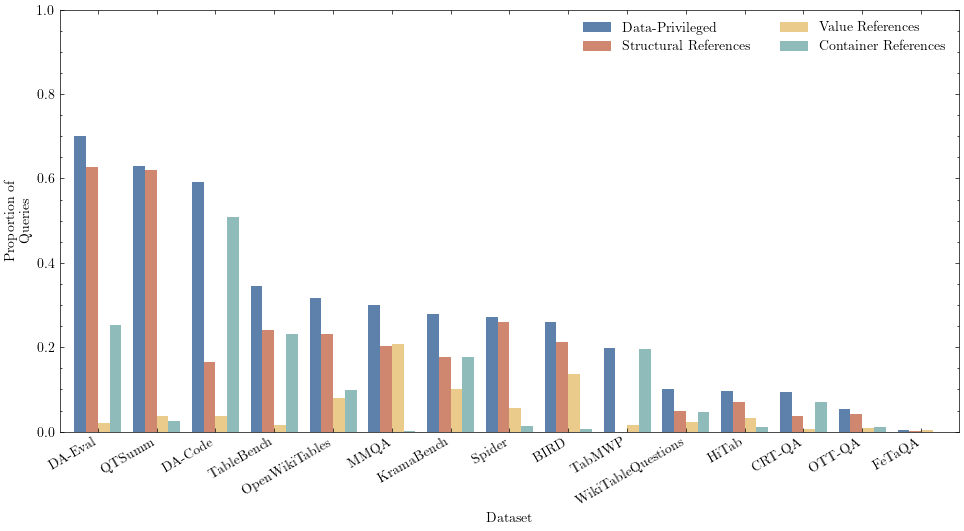

In [10]:
cm = 1/2.54

figsize=((25)*cm, 14*cm)

fig, ax = plt.subplots(figsize=figsize)
data_privilege_stats_df.plot(ax=ax, x="Dataset", kind="bar", stacked=False, width=0.8)
plt.ylabel("Proportion of\nQueries")
plt.xlabel("Dataset")
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right", minor=False)
ax.tick_params(axis="x", which="major", length=3, width=0.5)
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right", ncol=2)
plt.tight_layout()
plt.savefig("./plots/data_privilege/data_privilege_by_dataset.png", format="png", bbox_inches="tight")
plt.show()

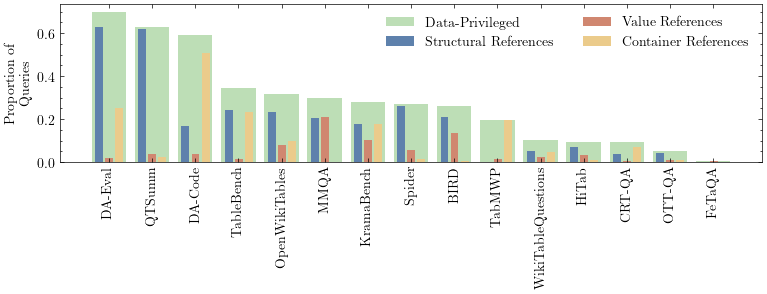

In [14]:
import numpy as np

cm = 1/2.54

figsize=((20)*cm, 8*cm)

full_bar_width = 0.8
inner_margin = 0.05
bar_width = (full_bar_width - 5*inner_margin)/3

x = np.arange(len(data_privilege_stats_df))

multiplier = 0

fig, ax = plt.subplots(figsize=figsize)

rects = ax.bar(x, data_privilege_stats_df["Data-Privileged"], width=full_bar_width, label="Data-Privileged", color="#bddeb6")

offset = -1.5 * bar_width + inner_margin
for attribute in ["Structural References", "Value References", "Container References"]:
    rects = ax.bar(x + offset, data_privilege_stats_df[attribute], width=bar_width, label=attribute)
    offset += bar_width + inner_margin

# plt.legend(loc="upper right")
ax.set_xticks(np.arange(len(data_privilege_stats_df)), data_privilege_stats_df["Dataset"], rotation=90, ha="center")
ax.tick_params(axis="x", which="minor", length=0, width=0)
plt.legend(loc="upper right", ncol=2)
plt.ylabel("Proportion of\nQueries")
plt.tight_layout()
plt.show()

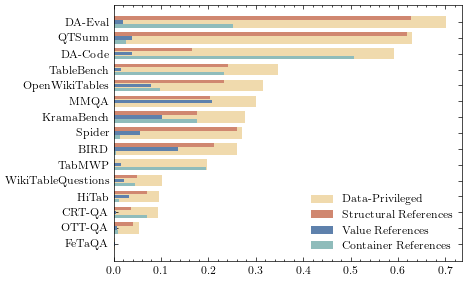

In [17]:
cm = 1 / 2.54
figsize = (10.476 * (7/6) * cm, 7.5 * cm) # Width can be small, height depends on items. Adjust as needed.

plt.rcParams.update({'font.size': 8}) # Set default font size to 8pt

full_bar_height = 0.5
inner_margin = 0.03 # A smaller margin can make it look tighter
bar_height = (full_bar_height - 2 * inner_margin) / 3

y_pos = np.arange(len(data_privilege_stats_df)) * 0.7

fig, ax = plt.subplots(figsize=figsize)

# Background bar
ax.barh(y_pos, data_privilege_stats_df["Data-Privileged"], height=full_bar_height,
        label="Data-Privileged", color=NORD_COLORBLIND[2], alpha=0.7, zorder=1)

# --- 2. Corrected Positioning Logic & Explicit Colors ---
attributes = ["Structural References", "Value References", "Container References"]
colors = [NORD_COLORBLIND[1], NORD_COLORBLIND[0], NORD_COLORBLIND[3]] # Orange, Dark Blue, Light Blue
num_attributes = len(attributes)

# Calculate offsets to center the group of bars
# For 3 bars, the offsets from the center will be [-1, 0, 1] * step
group_center_offsets = np.arange(num_attributes) - (num_attributes - 1) / 2.0
step = bar_height + inner_margin

for i, (attribute, color) in enumerate(zip(attributes, colors)):
    offset = group_center_offsets[i] * step
    ax.barh(y_pos + offset, data_privilege_stats_df[attribute], height=bar_height,
            label=attribute, color=color, zorder=2) # zorder keeps inner bars on top

# --- 3. Ticks, Labels, and Layout ---
ax.set_yticks(y_pos, data_privilege_stats_df["Dataset"])
ax.invert_yaxis() # To display the highest value at the top

#ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("") # No need for a y-axis title
ax.set_xlim(0, data_privilege_stats_df["Data-Privileged"].max() * 1.05) # Add 5% padding to x-axis

# Place legend in a good spot and fix typo
ax.legend(loc="lower right", frameon=False) # 'frameon', not 'Frameon'

ax.tick_params(axis="y", which="minor", length=0, width=0)

plt.tight_layout()
plt.savefig("./plots/data_privilege/data_privileged_by_dataset_bar.pdf", format="pdf")
plt.show()

## Analyze Sufficient Specification

In [18]:
sufficient_specification.head(10)

,query,dataset,id,entity_specification,entity_specification_analysis,temporal_specification,temporal_specification_analysis,domain_specification,domain_specification_analysis,task_specification,task_specification_analysis,scope_specification,scope_specification_analysis,sufficient_entity_specification,sufficient_temporal_specification,sufficient_domain_specification,sufficient_task_specification,sufficient_scope_specification
0,List the ID of all images with objects that ha...,BIRD,0,Underspecified,"Core entities like ""images,"" their ""ID,"" ""obje...",Not Applicable,No temporal aspect is implied or required; thi...,Underspecified (Ambiguous),The contextual boundary (which dataset/corpus ...,Specified,The user requests a concrete operation: produc...,Underspecified,"The filtering criterion ""objects that have mul...",False,True,False,True,False
1,How many stores belong to the most windy station?,BIRD,1,Underspecified,"Core entities are ambiguous: ""stores"" (which c...",Underspecified (Ambiguous),"""Most windy"" requires a time horizon (e.g., da...",Underspecified (Ambiguous),No geographical or organizational boundary is ...,Specified,The query requests a count of stores tied to a...,Underspecified,The method to identify the “most windy” statio...,False,False,False,True,False
2,What are the names of the establishments that ...,BIRD,2,Underspecified,"Core entities are unclear: ""establishments"" is...",Underspecified (Ambiguous),"""For 4 consecutive years"" is not anchored to s...",Underspecified (Ambiguous),"No geographic, organizational, or program boun...",Specified,The query asks to list (retrieve) the names of...,Specified,The condition is sufficiently precise: an esta...,False,False,False,True,True
3,"On 10/20/2014, what is the duration of the fas...",BIRD,3,Specified,Core entities are clearly identified: a specif...,Specified,Time frame is explicitly given as 10/20/2014. ...,Specified,The contextual boundary is the bike-share doma...,Specified,Find the minimum-duration (fastest) trip on th...,Specified,Procedure: (1) Filter trips to those with star...,True,True,True,True,True
4,Give the code of the airport described as Drif...,BIRD,4,Specified,The query explicitly identifies a unique entit...,Not Applicable,Airport codes are stable identifiers and not t...,Specified,The domain is clearly within global aviation/a...,Specified,The user asks to return the airport code for a...,Underspecified,"""Code"" is ambiguous (could be IATA, ICAO, or F...",True,True,True,True,False
5,"Among the sets in the block ""Ice Age"", how man...",BIRD,5,Specified,"""Block 'Ice Age'"" strongly indicates the Magic...",Not Applicable,The presence of an Italian translation for a s...,Specified,"The terminology of ""block"" and ""sets"" combined...",Specified,The query requests a count of items: number of...,Specified,The steps are straightforward: filter sets by ...,True,True,True,True,True
6,Calculate ratio between the highest unit cost ...,BIRD,6,Underspecified,"The query mentions ""unit cost"" and asks for hi...",Underspecified (Ambiguous),No timeframe is given. Unit costs are time-var...,Underspecified (Ambiguous),There is no contextual boundary (which company...,Specified,The user asks to compute a ratio comparing ext...,Underspecified,Ambiguity exists about the ratio’s direction (...,False,False,False,True,False
7,In which country can I find the circuit with t...,BIRD,7,Underspecified,"""Circuit"" is ambiguous: it could mean a motors...",Specified,The query is a superlative (“with the highest ...,Underspecified (Ambiguous),"No contextual boundary is provided (e.g., Form...",Specified,The user requests identifying the country that...,Specified,The method is straightforward: rank circuits b...,False,True,False,True,True
8,Among the employees working as Sales Represent...,BIRD,8,Underspecified,Core entity 'employees' is not tied to any org...,Underspecified (Assuming Recency),No time frame given; phrased in present tense ...,Underspecified (Amb

In [19]:
sufficient_specification["fully_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"], row["sufficient_scope_specification"], row["sufficient_task_specification"]]), axis=1)
sufficient_specification["data_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"]]), axis=1)
sufficient_specification["procedurally_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_scope_specification"], row["sufficient_task_specification"]]), axis=1)
sufficient_specification["analysis_specified"] = sufficient_specification.apply(lambda row: all([row["sufficient_entity_specification"], row["sufficient_temporal_specification"], row["sufficient_domain_specification"], row["sufficient_task_specification"]]), axis=1)

In [20]:
sufficient_specification_stat_mapping = []

for dataset in sufficient_specification["dataset"].unique():
    dataset_subset = sufficient_specification[sufficient_specification["dataset"] == dataset]
    sufficient_specification_stat_mapping.append({
        "Dataset": dataset,
        "Unambiguous": dataset_subset["fully_specified"].mean(),
        "Data Specified": dataset_subset["data_specified"].mean(),
        "Procedurally Specified": dataset_subset["procedurally_specified"].mean(),
        #"Analysis Specified": dataset_subset["analysis_specified"].mean(),
    })

sufficient_specification_stats_df = pd.DataFrame(sufficient_specification_stat_mapping)
sufficient_specification_stats_df.sort_values(by="Unambiguous", ascending=False, inplace=True)
sufficient_specification_stats_df

,Dataset,Unambiguous,Data Specified,Procedurally Specified
4,FeTaQA,0.526000,0.620000,0.800000
9,OpenWikiTables,0.496000,0.586000,0.750000
8,OTT-QA,0.478000,0.504000,0.888000
1,CRT-QA,0.224000,0.372000,0.532000
6,KramaBench,0.222222,0.287037,0.722222
5,HiTab,0.172000,0.220000,0.680000
14,WikiTableQuestions,0.170000,0.198000,0.820000
0,BIRD,0.154000,0.168000,0.774000
11,Spider,0.116000,0.128000,0.872000
13,TableBench,0.110000,0.134000,0.614000


In [21]:
sufficient_specification_stats_df = sufficient_specification_stats_df.set_index("Dataset").loc[data_privilege_stats_df["Dataset"]].reset_index()

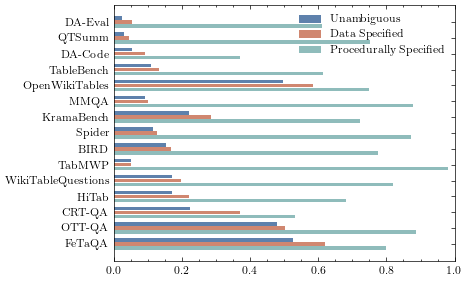

In [22]:
cm = 1 / 2.54
figsize = (10.476 * (7/6) * cm, 7.5 * cm) # Width can be small, height depends on items. Adjust as needed.

plt.rcParams.update({'font.size': 8}) # Set default font size to 8pt

full_bar_height = 0.5
inner_margin = 0.03 # A smaller margin can make it look tighter
bar_height = (full_bar_height - 2 * inner_margin) / 3

y_pos = np.arange(len(sufficient_specification_stats_df)) * 0.7

fig, ax = plt.subplots(figsize=figsize)

# --- 2. Corrected Positioning Logic & Explicit Colors ---
attributes = ["Unambiguous", "Data Specified", "Procedurally Specified"]
colors = [NORD_COLORBLIND[0], NORD_COLORBLIND[1], NORD_COLORBLIND[3]] # Orange, Dark Blue, Light Blue
num_attributes = len(attributes)

# Calculate offsets to center the group of bars
# For 3 bars, the offsets from the center will be [-1, 0, 1] * step
group_center_offsets = np.arange(num_attributes) - (num_attributes - 1) / 2.0
step = bar_height + inner_margin

for i, (attribute, color) in enumerate(zip(attributes, colors)):
    offset = group_center_offsets[i] * step
    ax.barh(y_pos + offset, sufficient_specification_stats_df[attribute], height=bar_height,
            label=attribute, color=color, zorder=2) # zorder keeps inner bars on top

# --- 3. Ticks, Labels, and Layout ---
ax.set_yticks(y_pos, sufficient_specification_stats_df["Dataset"])
ax.invert_yaxis() # To display the highest value at the top

#ax.set_xlabel("Proportion of Queries")
ax.set_ylabel("") # No need for a y-axis title
ax.set_xlim(0, 1) # Add 5% padding to x-axis

# Place legend in a good spot and fix typo
ax.legend(loc="upper right", frameon=False) # 'frameon', not 'Frameon'

ax.tick_params(axis="y", which="minor", length=0, width=0)

#ax.axes.set_yticklabels([])


plt.tight_layout()
plt.savefig("./plots/sufficient_specification/sufficient_specification_by_dataset.pdf", format="pdf")
plt.show()